In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action = 'ignore')

In [91]:
df = pd.read_csv('서울시 도로노선 정보.csv',encoding = 'cp949')

In [92]:
df1 = pd.read_csv('서울특별시 광진구_불법주정차 위반 단속 CCTV 위치정보_20220502.csv',encoding = 'cp949')

In [93]:
df2 = pd.read_csv('서울특별시 광진구_주정차단속현황_20230331.csv',encoding = 'cp949')

In [94]:
df3 = pd.read_csv('광진통합지도서비스-CCTV설치.csv')

In [95]:
df4 = pd.read_csv('광진통합지도서비스-공영주차장.csv')

In [96]:
df5 = pd.read_csv('서울시 광진구 교통사고 데이터.csv') 

https://namu.wiki/w/%EA%B4%91%EC%9E%A5%EB%8F%99

In [97]:
df[df['노선명(도로명)'].str.contains('영화사로')]

,순번,노선명(도로명),도로종류,도로기능,도로규모,도로폭,시도구도구분
24085,24086,영화사로,일반도로,국지도로,소로2류,폭8-10m,구도
24086,24087,영화사로1길,일반도로,국지도로,소로3류,폭6-8m,구도
24087,24088,영화사로11길,일반도로,국지도로,소로,6m미만,구도
24088,24089,영화사로13길,일반도로,국지도로,소로3류,폭6-8m,구도
24089,24090,영화사로15길,일반도로,국지도로,소로3류,폭6-8m,구도
24090,24091,영화사로16가길,일반도로,국지도로,소로3류,폭6-8m,구도
24091,24092,영화사로16길,일반도로,국지도로,소로,6m미만,구도
24092,24093,영화사로16나길,일반도로,국지도로,소로3류,폭6-8m,구도
24093,24094,영화사로3가길,일반도로,국지도로,소로,6m미만,구도
24094,24095,영화사로3길,일반도로,국지도로,소로,6m미만,구도


In [98]:
gwangjin_2023 = df2[df2['단속일시'].str.slice(0,4) == '2023']
gwangjin_2023 = gwangjin_2023[gwangjin_2023['단속지역'].isin(['광장동'])]

In [99]:
# gwangjin_road = df[df['노선명(도로명)'].str.contains('강변북로') | df['노선명(도로명)'].str.contains('강변역로')
#   | df['노선명(도로명)'].str.contains('광나루로') | df['노선명(도로명)'].str.contains('광장로')
#   | df['노선명(도로명)'].str.contains('구의강변로') | df['노선명(도로명)'].str.contains('구의로')
#   | df['노선명(도로명)'].str.contains('구천면로') | df['노선명(도로명)'].str.contains('군자로') 
#   | df['노선명(도로명)'].str.contains('긴고랑로') | df['노선명(도로명)'].str.contains('능동로')
#   | df['노선명(도로명)'].str.contains('답십리로') | df['노선명(도로명)'].str.contains('동일로')
#   | df['노선명(도로명)'].str.contains('뚝섬로') | df['노선명(도로명)'].str.contains('면목로')
#   | df['노선명(도로명)'].str.contains('아차산로') | df['노선명(도로명)'].str.contains('영화사로')
#   | df['노선명(도로명)'].str.contains('용마산로') | df['노선명(도로명)'].str.contains('워커힐로')
#   | df['노선명(도로명)'].str.contains('자양강변길') | df['노선명(도로명)'].str.contains('자양로')
#   | df['노선명(도로명)'].str.contains('자양번영로') | df['노선명(도로명)'].str.contains('천호대로')]

* 도로폭 = 도로 규모
> 도로규모로 판단 진행

In [100]:
df2.head()

,단속일시,과태료,단속지역,단속장소,위반내용,견인지시,단속구분
0,2015-01-01 06:44,32000,화양동,119-4,주정차금지,견인처리,PDA
1,2015-01-01 07:01,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,CCTV
2,2015-01-01 07:24,40000,구의동,동서울터미널 주차장앞,32조내지 34조위반,미견인,CCTV
3,2015-01-01 08:00,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,CCTV
4,2015-01-01 08:15,32000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,CCTV


In [101]:
gwangjin_2022 = df2[df2['단속일시'].str.slice(0,4) == '2022']

In [102]:
gwangjin_2022['단속구분'].value_counts()

PDA           18995
고정형CCTV       14383
안전신문고(행안부)     4083
스마트앱(서울시)      3539
CCTV           1405
주행형CCTV          25
일반               11
Name: 단속구분, dtype: int64

In [103]:
gwangjin_2022['위반내용'].value_counts()

교통소통장애           14109
주차금지(황색점선)구역      7011
보도                6433
주정차금지(황색실선)구역     4122
도로 모퉁이            2430
횡단보도              2424
버스정류소             2200
안전지대              1591
교차로                863
소화전                600
특별구역               235
주차방법위반             154
주차구획선외 주차          123
소방기계 비치장소           69
건널목                 25
이중주차                25
소방차(긴급차량)통행장애       24
유턴지역                 2
이면도로주차               1
Name: 위반내용, dtype: int64

In [104]:
gwangjin_2022['견인지시'].value_counts()

미견인     40899
견인처리     1542
Name: 견인지시, dtype: int64

In [105]:
gwangjin_2022['단속지역'].value_counts()

구의동         9978
중곡동         9627
자양동         9152
광장동         5369
화양동         2992
군자동         2921
능동          2390
긴고랑로           3
강변북로           1
동일로60길         1
천호대로104길       1
아차산로58길        1
자양강변길          1
면목로17길         1
아차산로70길        1
광나루로           1
군자로            1
Name: 단속지역, dtype: int64

* 광장동

In [106]:
gwangjin_2022 = gwangjin_2022[gwangjin_2022['단속지역'].isin(['광장동'])]

* 교통소통장애 - 교통량이 많은 도로에서 자동차 등이 급정거, 불법주정차, 신호위반 등으로 인해 교통이 원활하지 않아 다른 차량들이 움직이기 어려운 상황에서, 이를 방지하기 위해 실시하는 단속
* 주차금지(황색점선)구역
* 주정차금지(황색실선)구역

<AxesSubplot:xlabel='단속지역', ylabel='count'>

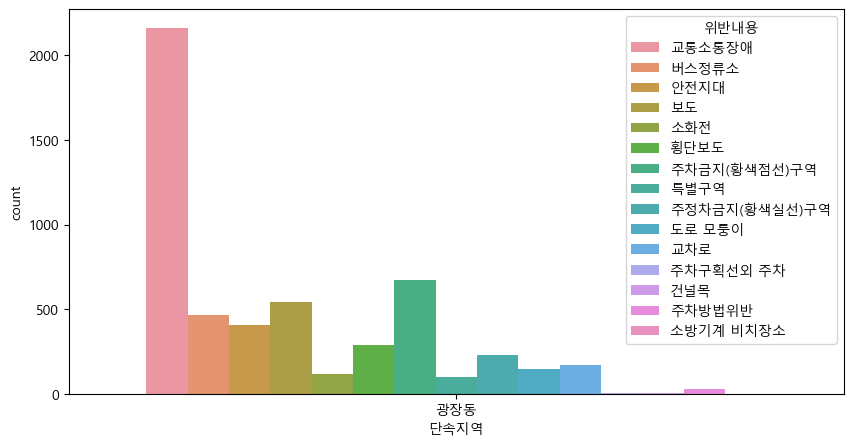

In [107]:
plt.figure(figsize = (10, 5))
sns.set_palette('Set3')
sns.countplot(x = gwangjin_2022['단속지역'], hue = gwangjin_2022['위반내용'])

* 교통소통장애 / 주차금지(황색점선)구역 / 보도

<AxesSubplot:xlabel='단속지역', ylabel='count'>

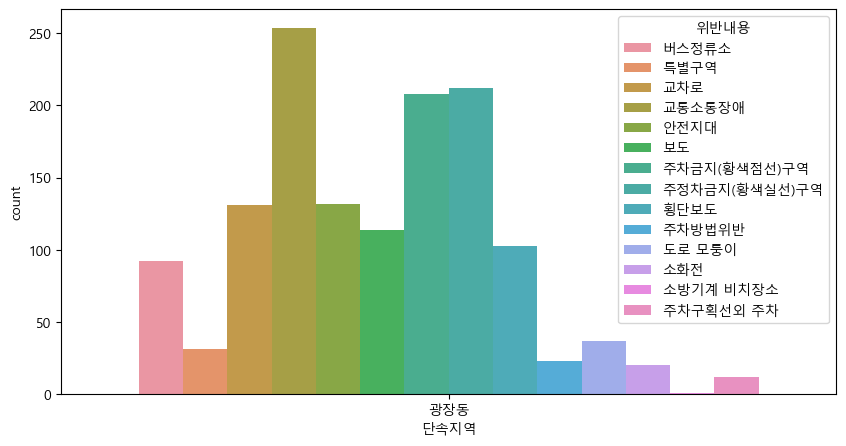

In [108]:
plt.figure(figsize = (10, 5))
sns.set_palette('Set3')
sns.countplot(x = gwangjin_2023['단속지역'], hue = gwangjin_2023['위반내용'])

<AxesSubplot:xlabel='단속지역', ylabel='count'>

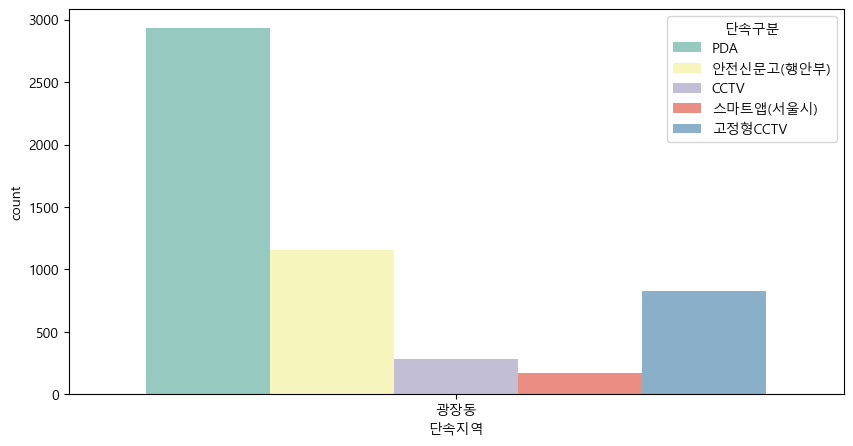

In [109]:
plt.figure(figsize = (10, 5))
sns.countplot(x = gwangjin_2022['단속지역'], hue = gwangjin_2022['단속구분'])

* PDA : 경찰관 단속 / 안전신문고(행안부) / 고정형 CCTV

<AxesSubplot:xlabel='단속지역', ylabel='count'>

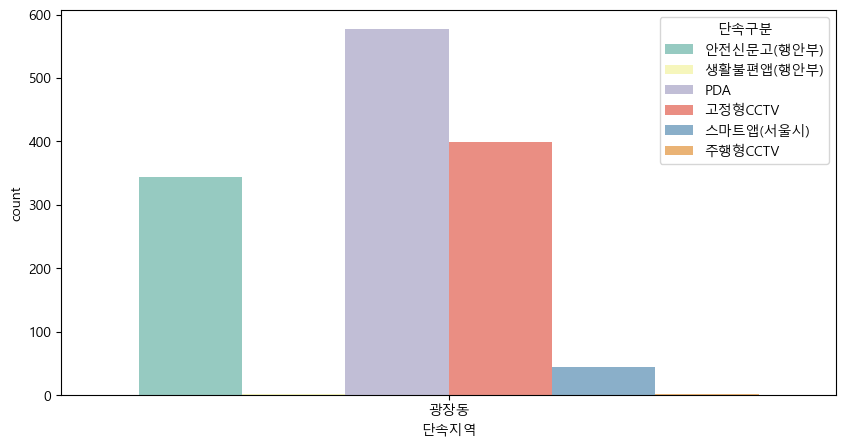

In [110]:
plt.figure(figsize = (10, 5))
sns.countplot(x = gwangjin_2023['단속지역'], hue = gwangjin_2023['단속구분'])

In [111]:
gwangjin_2022[gwangjin_2022['단속구분'] == '고정형CCTV']['단속장소'].unique()

array(['모두투어앞', '광현교회 앞', '광장 힐스테이 상가 건너편', '올림픽대교북단사거리', 'SK강평주유소 앞'],
      dtype=object)

In [112]:
# gwangjin_2022_warn = gwangjin_2022[gwangjin_2022['위반내용'].isin(['교통소통장애', '주차금지(황색점선)구역'])]

In [113]:
gwangjin_2022_PDA = gwangjin_2022[gwangjin_2022['단속구분'].isin(['PDA'])]
gwangjin_2022_warn = gwangjin_2022[gwangjin_2022['단속구분'].isin(['안전신문고(행안부)'])]
gwangjin_2023_PDA = gwangjin_2023[gwangjin_2023['단속구분'].isin(['PDA'])]
gwangjin_2023_warn = gwangjin_2023[gwangjin_2023['단속구분'].isin(['안전신문고(행안부)'])]

In [114]:
gwangjin_2022_warn_sort = gwangjin_2022_warn.groupby('단속장소', as_index = False)[['위반내용']].count().sort_values(by = '위반내용', ascending = False)
gwangjin_2022_PDA_sort = gwangjin_2022_PDA.groupby('단속장소', as_index = False)[['위반내용']].count().sort_values(by = '위반내용', ascending = False)
gwangjin_2023_warn_sort = gwangjin_2023_warn.groupby('단속장소', as_index = False)[['위반내용']].count().sort_values(by = '위반내용', ascending = False)
gwangjin_2023_PDA_sort = gwangjin_2023_PDA.groupby('단속장소', as_index = False)[['위반내용']].count().sort_values(by = '위반내용', ascending = False)

In [115]:
len(gwangjin_2022_PDA_sort)

366

* 기준 - 일주일에 1번 이상 단속

In [116]:
gwangjin_2022_warn_mean = gwangjin_2022_warn_sort[gwangjin_2022_warn_sort['위반내용'] >= 52]
gwangjin_2022_PDA_mean = gwangjin_2022_PDA_sort[gwangjin_2022_PDA_sort['위반내용'] >= 52]
gwangjin_2023_warn_mean = gwangjin_2023_warn_sort[gwangjin_2023_warn_sort['위반내용'] >= 13]
gwangjin_2023_PDA_mean = gwangjin_2023_PDA_sort[gwangjin_2023_PDA_sort['위반내용'] >= 13]

In [117]:
gwangjin_2022_warn_mean

,단속장소,위반내용
126,486-1,222
123,484,125
114,453-7,71
64,320-4,61


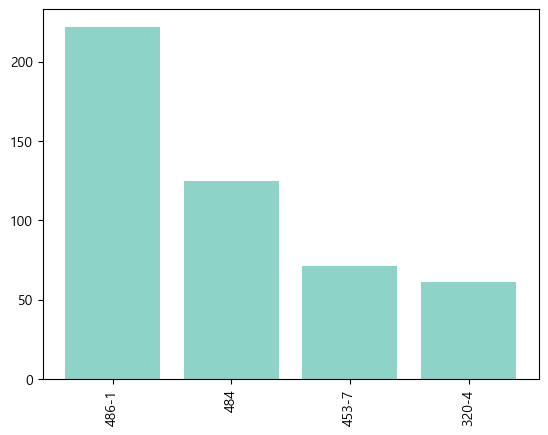

In [118]:
plt.bar(x = gwangjin_2022_warn_mean['단속장소'], height = gwangjin_2022_warn_mean['위반내용'])
plt.xticks(rotation = 90)
plt.show()

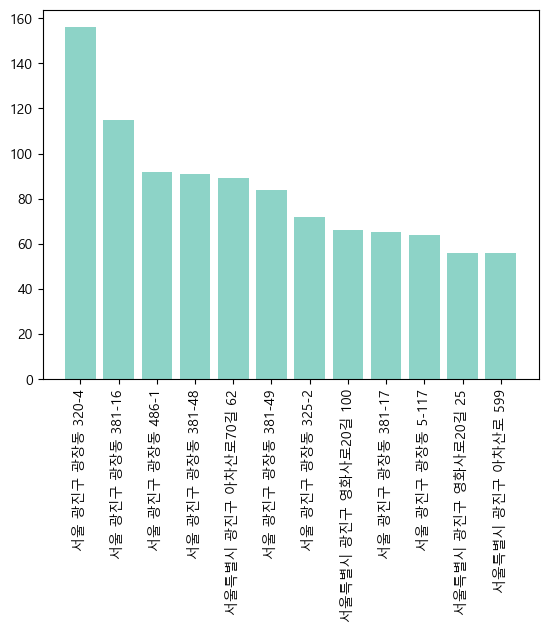

In [119]:
plt.bar(x = gwangjin_2022_PDA_mean['단속장소'], height = gwangjin_2022_PDA_mean['위반내용'])
plt.xticks(rotation = 90)
plt.show()

* geopy를 사용하여 주소에 대한 좌표 들고오기
* 좌표에 대한 Folium 사용하여 위치 확인

> 좌표와 CCTV 설치 구역을 비교해서 우선적인 추가 장소 파악

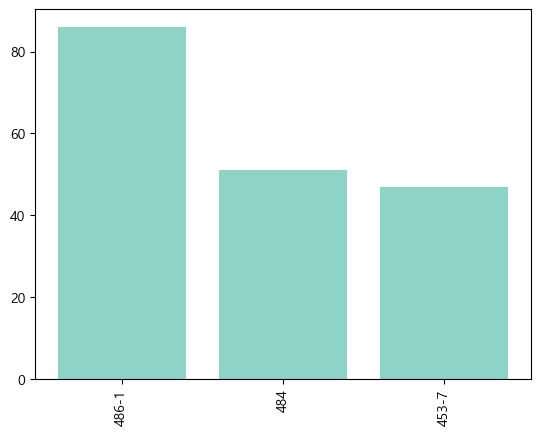

In [120]:
plt.bar(x = gwangjin_2023_warn_mean['단속장소'], height = gwangjin_2023_warn_mean['위반내용'])
plt.xticks(rotation = 90)
plt.show()

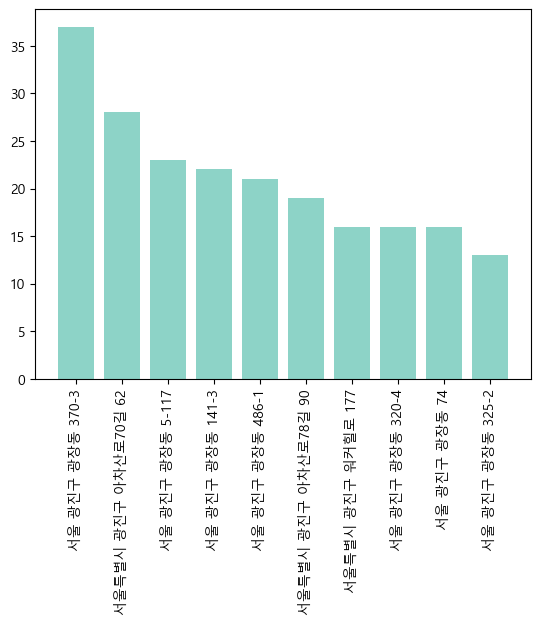

In [121]:
plt.bar(x = gwangjin_2023_PDA_mean['단속장소'], height = gwangjin_2023_PDA_mean['위반내용'])
plt.xticks(rotation = 90)
plt.show()

In [123]:
!pip install folium

In [124]:
# import folium as m


# gwangjin_m = m.Map(
#     location=[37.5287142, 127.0883594],
#     #tiles = 'Stamen Terrain',
#     zoom_start=15
# )

# for i in range(len(gwangjin_2022_gu_sort)):
#     marker01 = m.Marker([gwangjin_2022_gu_sort.loc[i]['위도'], gwangjin_2022_gu_sort.loc[i]['경도']],
#                      icon = m.Icon(color = 'red', icon = 'star'), popup = gwangjin_2022_gu_sort.loc[i]['단속장소'])
#     marker01.add_to(gwangjin_m)
# gwangjin_m

* CCTV가 설치되어 있는 위치 데이터셋 추가

In [126]:
df1.head()

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분
0,서울 광진구 광장동 334-2,37.547790,127.106990,광진구,모두투어앞,불법주정차구역
1,서울 광진구 광장동 445-3,37.543799,127.102410,광진구,광현교회 앞,불법주정차구역
2,서울 광진구 구의동 135,37.549593,127.081780,광진구,아차산역 5번출구 앞,불법주정차구역
3,서울 광진구 군자동 503,37.548609,127.071072,광진구,두산위브 앞,불법주정차구역
4,서울 광진구 구의동 66-62,37.545348,127.088420,광진구,국민은행 앞,불법주정차구역


In [127]:
df1['행정동'] = ''

In [128]:
for i in range(len(df1['고정형CCTV지번주소'])):
    df1['행정동'][i] = df1['고정형CCTV지번주소'][i].split(' ')[2]

<AxesSubplot:xlabel='행정동', ylabel='count'>

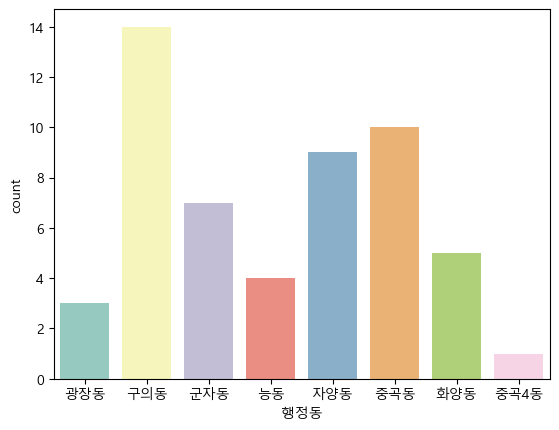

In [129]:
sns.countplot(df1['행정동'])

In [130]:
gwangjang = df1[df1['행정동'] == '광장동']

In [131]:
gwangjang

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분,행정동
0,서울 광진구 광장동 334-2,37.547790,127.10699,광진구,모두투어앞,불법주정차구역,광장동
1,서울 광진구 광장동 445-3,37.543799,127.10241,광진구,광현교회 앞,불법주정차구역,광장동
37,서울 광진구 광장동 565,37.541929,127.09967,광진구,광장 힐스테이 상가 건너편,불법주정차구역,광장동


In [132]:
df5['행정동'] = ''

In [133]:
for i in range(len(df5['시군구'])):
    df5['행정동'][i] = df5['시군구'][i].split(' ')[2]

<AxesSubplot:xlabel='행정동', ylabel='count'>

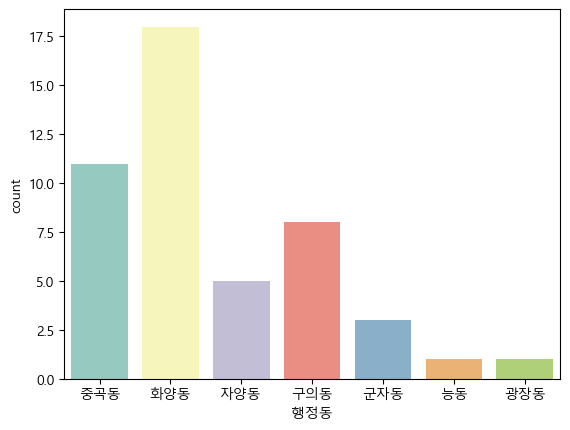

In [134]:
sns.countplot(df5['행정동'])

In [135]:
df5[df5['행정동'] == '광장동']

,시군구,사고내용,사고유형,법규위반,행정동
30,서울특별시 광진구 광장동,경상사고,차대사람 - 길가장자리구역통행중,안전운전불이행,광장동


In [136]:
gwangjang = gwangjang.reset_index(drop = True)
gwangjang

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분,행정동
0,서울 광진구 광장동 334-2,37.547790,127.10699,광진구,모두투어앞,불법주정차구역,광장동
1,서울 광진구 광장동 445-3,37.543799,127.10241,광진구,광현교회 앞,불법주정차구역,광장동
2,서울 광진구 광장동 565,37.541929,127.09967,광진구,광장 힐스테이 상가 건너편,불법주정차구역,광장동


장순루 사거리(아차산로76길 11, 광장동) 37.547659, 127.107739

어광수의원 앞(아차산로69길 8, 광장동) 37.542424, 127.098331

아차산 등반로(영화사로 중간지대, 구의2동) 37.552598, 127.099636

https://blog.naver.com/dbilbo/223023553071

In [137]:
gwangjang.loc[3] = ['아차산로76길 11, 광장동', 37.547659, 127.107739, '광진구','장순루 사거리', '불법주차구역', '광장동']
gwangjang.loc[4] = ['아차산로69길 8, 광장동', 37.542424, 127.098331, '광진구','어광수의원 앞', '불법주차구역', '광장동']
gwangjang.loc[5] = ['영화사로 중간지대, 구의2동', 37.552598, 127.099636, '광진구','아차산 등반로', '불법주차구역', '구의2동']

In [138]:
gwangjang

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분,행정동
0,서울 광진구 광장동 334-2,37.547790,127.106990,광진구,모두투어앞,불법주정차구역,광장동
1,서울 광진구 광장동 445-3,37.543799,127.102410,광진구,광현교회 앞,불법주정차구역,광장동
2,서울 광진구 광장동 565,37.541929,127.099670,광진구,광장 힐스테이 상가 건너편,불법주정차구역,광장동
3,"아차산로76길 11, 광장동",37.547659,127.107739,광진구,장순루 사거리,불법주차구역,광장동
4,"아차산로69길 8, 광장동",37.542424,127.098331,광진구,어광수의원 앞,불법주차구역,광장동
5,"영화사로 중간지대, 구의2동",37.552598,127.099636,광진구,아차산 등반로,불법주차구역,구의2동


* 고정용 CCTV와 관련

In [139]:
gwangjin_2022_warn_mean['단속장소'] = '서울 광진구 광장동 ' + gwangjin_2022_warn_mean['단속장소']

* 도로명 주소 : PDA / 486-1과 같이 숫자로 입력 : 안전신문고

In [140]:
gwangjin_2022_warn_mean = gwangjin_2022_warn_mean.reset_index(drop = True)
gwangjin_2022_warn_mean

,단속장소,위반내용
0,서울 광진구 광장동 486-1,222
1,서울 광진구 광장동 484,125
2,서울 광진구 광장동 453-7,71
3,서울 광진구 광장동 320-4,61


In [141]:
gwangjin_2023_warn_mean = gwangjin_2023_warn_mean.reset_index(drop = True)
gwangjin_2023_warn_mean

,단속장소,위반내용
0,486-1,86
1,484,51
2,453-7,47


* 2022 - 2023의 차이가 없음

In [142]:
gwangjin_2022_PDA_mean = gwangjin_2022_PDA_mean.reset_index(drop = True)
gwangjin_2022_PDA_mean

,단속장소,위반내용
0,서울 광진구 광장동 320-4,156
1,서울 광진구 광장동 381-16,115
2,서울 광진구 광장동 486-1,92
3,서울 광진구 광장동 381-48,91
4,서울특별시 광진구 아차산로70길 62,89
5,서울 광진구 광장동 381-49,84
6,서울 광진구 광장동 325-2,72
7,서울특별시 광진구 영화사로20길 100,66
8,서울 광진구 광장동 381-17,65
9,서울 광진구 광장동 5-117,64


In [143]:
gwangjin_2023_PDA_mean = gwangjin_2023_PDA_mean.reset_index(drop = True)
gwangjin_2023_PDA_mean

,단속장소,위반내용
0,서울 광진구 광장동 370-3,37
1,서울특별시 광진구 아차산로70길 62,28
2,서울 광진구 광장동 5-117,23
3,서울 광진구 광장동 141-3,22
4,서울 광진구 광장동 486-1,21
5,서울특별시 광진구 아차산로78길 90,19
6,서울특별시 광진구 워커힐로 177,16
7,서울 광진구 광장동 320-4,16
8,서울 광진구 광장동 74,16
9,서울 광진구 광장동 325-2,13


* 차이가 나는 것 확인

In [144]:
df[df['노선명(도로명)'].str.contains('영화사')]

,순번,노선명(도로명),도로종류,도로기능,도로규모,도로폭,시도구도구분
24085,24086,영화사로,일반도로,국지도로,소로2류,폭8-10m,구도
24086,24087,영화사로1길,일반도로,국지도로,소로3류,폭6-8m,구도
24087,24088,영화사로11길,일반도로,국지도로,소로,6m미만,구도
24088,24089,영화사로13길,일반도로,국지도로,소로3류,폭6-8m,구도
24089,24090,영화사로15길,일반도로,국지도로,소로3류,폭6-8m,구도
24090,24091,영화사로16가길,일반도로,국지도로,소로3류,폭6-8m,구도
24091,24092,영화사로16길,일반도로,국지도로,소로,6m미만,구도
24092,24093,영화사로16나길,일반도로,국지도로,소로3류,폭6-8m,구도
24093,24094,영화사로3가길,일반도로,국지도로,소로,6m미만,구도
24094,24095,영화사로3길,일반도로,국지도로,소로,6m미만,구도


In [145]:
gwangjin_2022_warn_mean['위도'] = ''
gwangjin_2022_warn_mean['경도'] = ''
gwangjin_2022_warn_mean['노선명(도로명)'] = ''

In [146]:
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 486-1','위도'] = 37.539802
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 486-1','경도'] = 127.099012
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 486-1','노선명(도로명)'] = '아차산로70길'

gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 484','위도'] = 37.540314
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 484','경도'] = 127.099414
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 484','노선명(도로명)'] = '아차산로70길'

gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 453-7','위도'] = 37.541905
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 453-7','경도'] = 127.101560
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 453-7','노선명(도로명)'] = '아차산로70길'

gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 320-4','위도'] = 37.547137
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 320-4','경도'] = 127.107813
gwangjin_2022_warn_mean.loc[gwangjin_2022_warn_mean.단속장소 == '서울 광진구 광장동 320-4','노선명(도로명)'] = '아차산로76길'

In [147]:
gwangjin_2022_warn_mean

,단속장소,위반내용,위도,경도,노선명(도로명)
0,서울 광진구 광장동 486-1,222,37.539802,127.099012,아차산로70길
1,서울 광진구 광장동 484,125,37.540314,127.099414,아차산로70길
2,서울 광진구 광장동 453-7,71,37.541905,127.10156,아차산로70길
3,서울 광진구 광장동 320-4,61,37.547137,127.107813,아차산로76길


In [148]:
gwangjin_2022_warn_mean = pd.merge(gwangjin_2022_warn_mean, df, how = 'left', on = '노선명(도로명)')

In [149]:
gwangjin_2022_warn_mean = gwangjin_2022_warn_mean.drop(['순번', '시도구도구분','도로기능', '도로종류'], axis = 1)

In [150]:
gwangjin_2022_PDA_mean

,단속장소,위반내용
0,서울 광진구 광장동 320-4,156
1,서울 광진구 광장동 381-16,115
2,서울 광진구 광장동 486-1,92
3,서울 광진구 광장동 381-48,91
4,서울특별시 광진구 아차산로70길 62,89
5,서울 광진구 광장동 381-49,84
6,서울 광진구 광장동 325-2,72
7,서울특별시 광진구 영화사로20길 100,66
8,서울 광진구 광장동 381-17,65
9,서울 광진구 광장동 5-117,64


In [151]:
gwangjin_2022_PDA_mean['위도'] = ''
gwangjin_2022_PDA_mean['경도'] = ''
gwangjin_2022_PDA_mean['노선명(도로명)'] = ''

In [152]:
gwangjin_2023_PDA_mean['위도'] = ''
gwangjin_2023_PDA_mean['경도'] = ''
gwangjin_2023_PDA_mean['노선명(도로명)'] = ''

In [153]:
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 486-1','위도'] = 37.539802
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 486-1','경도'] = 127.099012
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 486-1','노선명(도로명)'] = '아차산로70길'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-16','위도'] = 37.549852
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-16','경도'] = 127.099767
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-16','노선명(도로명)'] = '영화사로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-48','위도'] = 37.551843
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-48','경도'] = 127.099957
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-48','노선명(도로명)'] = '영화사로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 320-4','위도'] = 37.547137
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 320-4','경도'] = 127.107813
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 320-4','노선명(도로명)'] = '아차산로76길'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 아차산로70길 62','위도'] = 37.540161
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 아차산로70길 62','경도'] = 127.099176
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 아차산로70길 62','노선명(도로명)'] = '아차산로70길'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 영화사로20길 100','위도'] = 37.550122
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 영화사로20길 100','경도'] = 127.099971
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 영화사로20길 100','노선명(도로명)'] = '영화사로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 영화사로20길 25','위도'] = 37.550033
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 영화사로20길 25','경도'] = 127.100393
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 영화사로20길 25','노선명(도로명)'] = '영화사로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-49','위도'] = 37.552031
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-49','경도'] = 127.099784
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-49','노선명(도로명)'] = '영화사로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 325-2','위도'] = 37.547853
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 325-2','경도'] = 127.107580
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 325-2','노선명(도로명)'] = '아차산로76길'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-17','위도'] = 37.550670
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-17','경도'] = 127.100143
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 381-17','노선명(도로명)'] = '영화사로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 5-117','위도'] = 37.551338
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 5-117','경도'] = 127.101700
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울 광진구 광장동 5-117','노선명(도로명)'] = '워커힐로'

gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 아차산로 599','위도'] = 37.547163
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 아차산로 599','경도'] = 127.104854
gwangjin_2022_PDA_mean.loc[gwangjin_2022_PDA_mean.단속장소 == '서울특별시 광진구 아차산로 599','노선명(도로명)'] = '광장로'

In [154]:
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 486-1','위도'] = 37.539802
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 486-1','경도'] = 127.099012
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 486-1','노선명(도로명)'] = '아차산로70길'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 320-4','위도'] = 37.547137
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 320-4','경도'] = 127.107813
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 320-4','노선명(도로명)'] = '아차산로76길'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 아차산로70길 62','위도'] = 37.540161
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 아차산로70길 62','경도'] = 127.099176
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 아차산로70길 62','노선명(도로명)'] = '아차산로70길'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 325-2','위도'] = 37.547853
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 325-2','경도'] = 127.107580
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 325-2','노선명(도로명)'] = '아차산로76길'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 5-117','위도'] = 37.551338
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 5-117','경도'] = 127.101700
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 5-117','노선명(도로명)'] = '워커힐로'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 370-3','위도'] = 37.551995
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 370-3','경도'] = 127.099809
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 370-3','노선명(도로명)'] = '영화사로'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 141-3','위도'] = 37.551544
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 141-3','경도'] = 127.110080
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 141-3','노선명(도로명)'] = '아차산로78길'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 아차산로78길 90','위도'] = 37.551002
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 아차산로78길 90','경도'] = 127.110809
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 아차산로78길 90','노선명(도로명)'] = '아차산로78길'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 워커힐로 177','위도'] = 37.554716
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 워커힐로 177','경도'] = 127.110342
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울특별시 광진구 워커힐로 177','노선명(도로명)'] = '워커힐로'

gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 74','위도'] = 37.552464
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 74','경도'] = 127.110914
gwangjin_2023_PDA_mean.loc[gwangjin_2023_PDA_mean.단속장소 == '서울 광진구 광장동 74','노선명(도로명)'] = '워커힐로'

In [155]:
gwangjin_2023_PDA_mean

,단속장소,위반내용,위도,경도,노선명(도로명)
0,서울 광진구 광장동 370-3,37,37.551995,127.099809,영화사로
1,서울특별시 광진구 아차산로70길 62,28,37.540161,127.099176,아차산로70길
2,서울 광진구 광장동 5-117,23,37.551338,127.1017,워커힐로
3,서울 광진구 광장동 141-3,22,37.551544,127.11008,아차산로78길
4,서울 광진구 광장동 486-1,21,37.539802,127.099012,아차산로70길
5,서울특별시 광진구 아차산로78길 90,19,37.551002,127.110809,아차산로78길
6,서울특별시 광진구 워커힐로 177,16,37.554716,127.110342,워커힐로
7,서울 광진구 광장동 320-4,16,37.547137,127.107813,아차산로76길
8,서울 광진구 광장동 74,16,37.552464,127.110914,워커힐로
9,서울 광진구 광장동 325-2,13,37.547853,127.10758,아차산로76길


In [156]:
gwangjin_2023_PDA_mean = pd.merge(gwangjin_2023_PDA_mean, df, how = 'left', on = '노선명(도로명)')

In [157]:
gwangjin_2023_PDA_mean = gwangjin_2023_PDA_mean.drop(['순번', '시도구도구분','도로기능', '도로종류'], axis = 1)

In [158]:
gwangjin_2022_PDA_mean = pd.merge(gwangjin_2022_PDA_mean, df, how = 'left', on = '노선명(도로명)')

In [159]:
gwangjin_2022_PDA_mean = gwangjin_2022_PDA_mean.drop(['순번', '시도구도구분','도로기능', '도로종류'], axis = 1)

In [167]:
gwangjin_2023_PDA_mean

,단속장소,위반내용,위도,경도,노선명(도로명),도로규모,도로폭
0,서울 광진구 광장동 370-3,37,37.551995,127.099809,영화사로,소로2류,폭8-10m
1,서울특별시 광진구 아차산로70길 62,28,37.540161,127.099176,아차산로70길,중로1류,폭20-25m
2,서울 광진구 광장동 5-117,23,37.551338,127.1017,워커힐로,소로2류,폭8-10m
3,서울 광진구 광장동 141-3,22,37.551544,127.11008,아차산로78길,소로1류,폭10-12m
4,서울 광진구 광장동 486-1,21,37.539802,127.099012,아차산로70길,중로1류,폭20-25m
5,서울특별시 광진구 아차산로78길 90,19,37.551002,127.110809,아차산로78길,소로1류,폭10-12m
6,서울특별시 광진구 워커힐로 177,16,37.554716,127.110342,워커힐로,소로2류,폭8-10m
7,서울 광진구 광장동 320-4,16,37.547137,127.107813,아차산로76길,소로2류,폭8-10m
8,서울 광진구 광장동 74,16,37.552464,127.110914,워커힐로,소로2류,폭8-10m
9,서울 광진구 광장동 325-2,13,37.547853,127.10758,아차산로76길,소로2류,폭8-10m


In [166]:
gwangjin_2023[gwangjin_2023.단속장소 == '서울 광진구 광장동 370-3'] 

,단속일시,과태료,단속지역,단속장소,위반내용,견인지시,단속구분
495148,2023-01-23 14:52,32000,광장동,서울 광진구 광장동 370-3,안전지대,미견인,PDA
495149,2023-01-23 14:53,32000,광장동,서울 광진구 광장동 370-3,안전지대,미견인,PDA
495150,2023-01-23 14:53,32000,광장동,서울 광진구 광장동 370-3,안전지대,미견인,PDA
495157,2023-01-23 17:02,32000,광장동,서울 광진구 광장동 370-3,안전지대,미견인,PDA
495158,2023-01-23 17:02,32000,광장동,서울 광진구 광장동 370-3,안전지대,미견인,PDA
495159,2023-01-23 17:03,32000,광장동,서울 광진구 광장동 370-3,주정차금지(황색실선)구역,미견인,PDA
495644,2023-01-29 15:56,32000,광장동,서울 광진구 광장동 370-3,교통소통장애,미견인,PDA
495645,2023-01-29 15:57,32000,광장동,서울 광진구 광장동 370-3,교통소통장애,미견인,PDA
495646,2023-01-29 15:58,32000,광장동,서울 광진구 광장동 370-3,교통소통장애,미견인,PDA
495647,2023-01-29 15:58,32000,광장동,서울 광진구 광장동 370-3,교통소통장애,미견인,PDA


In [164]:
import folium as m


gwangjin_m = m.Map(
    location=[37.5287142, 127.0883594],
    #tiles = 'Stamen Terrain',
    zoom_start=15
)

for i in range(len(gwangjin_2022_PDA_mean)):
    marker01 = m.Marker([gwangjin_2022_PDA_mean.loc[i]['위도'], gwangjin_2022_PDA_mean.loc[i]['경도']],
                     icon = m.Icon(color = 'red'), popup = gwangjin_2022_PDA_mean.loc[i]['단속장소'])
    marker01.add_to(gwangjin_m)
    
for i in range(len(gwangjin_2022_warn_mean)):
    marker02 = m.Marker([gwangjin_2022_warn_mean.loc[i]['위도'], gwangjin_2022_warn_mean.loc[i]['경도']],
                     icon = m.Icon(color = 'pink'), popup = gwangjin_2022_warn_mean.loc[i]['단속장소'])
    marker02.add_to(gwangjin_m)
    
for i in range(len(gwangjin_2023_PDA_mean)):
    marker03 = m.Marker([gwangjin_2023_PDA_mean.loc[i]['위도'], gwangjin_2023_PDA_mean.loc[i]['경도']],
                     icon = m.Icon(color = 'orange'), popup = gwangjin_2023_PDA_mean.loc[i]['단속장소'])
    marker03.add_to(gwangjin_m)   
    
for i in range(len(gwangjang)):
    marker04 = m.Marker([gwangjang.loc[i]['위도'], gwangjang.loc[i]['경도']],
                     icon = m.Icon(color = 'green'), popup = gwangjang.loc[i]['단속지점명'])
    marker04.add_to(gwangjin_m)  
gwangjin_m

https://map.naver.com/v5/search/%EC%95%84%EC%B0%A8%EC%82%B0%EB%A1%9C%2070%EA%B8%B8%2062/address/14148576.702062342,4514740.39357803,%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B4%91%EC%A7%84%EA%B5%AC%20%EC%95%84%EC%B0%A8%EC%82%B0%EB%A1%9C70%EA%B8%B8%2062,new?c=18.21,0,0,0,dha&isCorrectAnswer=true&p=XHuK9vNh0xSO6GbwWlOgZg,-136.5,0.34,80,Float

* 아차산로 70길 / 아차산로 78길 / 그랜드 워커힐 근처 

* 안전 신문고 신고는 2022년 많이 나온 구간이 2023년에 줄어 들지 않았음

* 2022년의 PDA 단속이 가장 많았던 아차산로 76길에 대한 신고가 2023년에 줄어든 것을 확인